# \setlength{\parindent}{0pt}  

Christopher Wilbar   
MSDS_422-DL_SEC55    
Assignment 5: Principal Components Analysis   
Kaggle Display Name: Chris Wilbar
Kaggle User Name: cwilbar 
Kaggle User ID: 538226

## 1. Summary and Problem Definition  

**Problem Definition:**   
Explore Prinicipal Components Analysis and Random Forest Classification. Participate in Kaggle competition to generate multi-class classifier on the MNIST data set. Determine if you would reccommend using PCA as a preliminary to machine learning classification, considering the predictive accuracy of models must be weighed against the costs of model development and implementation

    
**Summary**:   
In this specific application, Random Forest Classification performed best without any Prinicipal Components Analysis or standardization. PCA allows the user to understand complex data visually, but it was slower than the generic RFC and performed worse. This was a relatively small dataset, however, and other algortihms may not be as efficient as RCF in the future.

## 2. Results and Recommendations

**Results and Recomendations** 

1. PCA helps idnetifiy the key components, but the full dataset with all features should be evaulated if possible.

2. PCA is a great start to get a grasp on the data, but needs to be used with caution as there will be some performance degredation and it may even add time to analysis rather than save it.

3. If fitting the entire model is not possible, PCA does perform reasonably well that it can be considered since there is not a huge drop in accuracy.

## 3. Research Design and Methods Used

**Research Design**   

The MNIST data-set is a well-known dataset with labeled classifications of hand-drawn numbers. 

**Methods Used**  
Pyhton v.3 Jupyter Notebook was created to perform the analysis.
The following packages were used:
pandas, numpy, matplotlip.pyplot, seaborn, sklearn, math
  
Basic pyhton descriptive statisitcs were generated. 
Because the response variable was one of 10 classes, multi-class classification methods are appropriate.

Sci-kit learn was the primary tool for analysis.

Random Forest Classification was the primary tool, with Principal Components Analysis evaluated for pre-processing.

## 4. Programming Work

## 4.1 | Initial Setup and Preliminary Exploration

In [1]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# import seaborn as 
import matplotlib as mpl #image display
from time import time #time tracking
import matplotlib.pyplot as plt  #plots
#from matplotlib import rc

#import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, SparsePCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

C:\Users\nm179525\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Import Test and Train Data
dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")
print("Train Data Shape : ", dftrain.shape)
print("Test Data Shape : ", dftest.shape)

Train Data Shape :  (42000, 785)
Test Data Shape :  (28000, 784)


In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [3]:
#Get Idea of first five rows
dftrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dftest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# We need to split off the explanatory from the response variable
X_train, y_train, X_test = dftrain.iloc[:,1:], dftrain.iloc[:,0], dftest

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (42000, 784)
y_train shape:  (42000,)
X_test shape:  (28000, 784)


In [6]:
#We will use this function from handson-ml hithun to display the images
# https://github.com/cwilbar04/handson-ml/blob/master/03_classification.ipynb

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

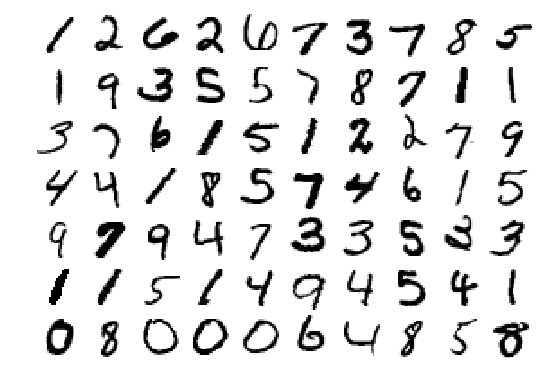

In [7]:
#Plot subset of data to confirm that we are workign with images as expected
plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:12000:600], X_train[13000:30600:600], X_train[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

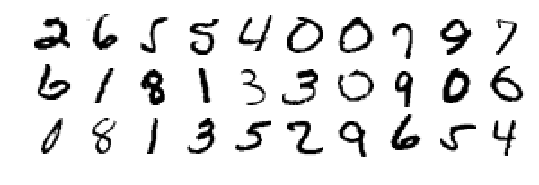

In [9]:
#Plot subset of train data to get a feel for how the fit performmed
plt.figure(figsize=(9,9))
example_test_images = np.r_[X_test[:3000:300], X_test[3000:6000:300], X_test[6000:9000:300]]
plot_digits(example_test_images, images_per_row=10)
plt.show()

In [10]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## 4.2 |  Kaggle Submission #1

Random Forest Classifer  

    Model Fit Time Elaspsed :  1.896108 seconds
    Kaggle Accuracy Score: 0.94242

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [5]:
y_train.dtype

dtype('int64')

In [12]:
from mnist import MNIST
import numpy as np
#mndata = MNIST('mnist/') #


In [16]:
mndata = MNIST('./')

In [18]:
mndata.gz = True

In [19]:
images, labels = mndata.load_training()  #assigns training data
images1, labels1=mndata.load_testing()   #assigns test data

In [20]:
for i in range(3):
    print(mndata.display(images[i]))


............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................

............................
............................
............................
............................
.................@..........
...............@@@@@........
............

In [21]:
images=np.array(images) #coverts train images to arrays
images1=np.array(images1) #converts test images to arrays
labels=np.array(labels) #converts train label to vector
labels1=np.array(labels1) #converts test lable to vector

In [29]:
from sklearn.ensemble import RandomForestClassifier as rfc
rf = rfc(random_state=1234, n_jobs=-1, n_estimators=90) #expanding n_estimators improves performance.. until it doesn't
rf.fit(images, labels)
print("Accuracy: ",rf.score(images1,labels1))

Accuracy:  0.9707


In [31]:
images1.dtype

dtype('int32')

In [44]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [45]:
y_train = np.array(y_train)

In [46]:
#For the first experiment we fit a random forest classifier on the whole data set and time how long it takes to fit the model
# We are given the parameters to use for this case:
#n_features=10 okay because of large number of observations
#max_features = 'sqrt' as reccommended by Müller and Guido (2017) 
#bootstrap = True
#n_jobs = 1 to use all available processers

rfc = RandomForestClassifier(n_estimators = 90, n_jobs=-1, random_state = 1234)

#Intitialize beginning time for fit
start_time = time()

#Fit model
rfc.fit(X_train,y_train)

#Determine ending time for fit
elapsed_time = time() - start_time

#Display time elapsed
print("Experiment 1 Model Fit Time Elaspsed : ", round(elapsed_time,6), "seconds")

Experiment 1 Model Fit Time Elaspsed :  12.784731 seconds


In [42]:
#We first check the accuracy of the fit model on the training data:
y_train_pred_rfc = rfc.predict(X_train)
print("Training accuracy = ", round(100*accuracy_score(y_train, y_train_pred_rfc),2), "%")

Training accuracy =  100.0 %


In [28]:
rf.score(X_test,images1)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 28000]

In [13]:
#We now use the fit model to predict the classification of the test data and create Kaggle submission # 1
y_test_pred_rfc = rfc.predict(X_test)

# output result
dataframe = pd.DataFrame({"ImageId": list(range(1,len(y_test_pred_rfc)+1)), "Label": y_test_pred_rfc})
dataframe.to_csv('output_rfc.csv', index=False, header=True)

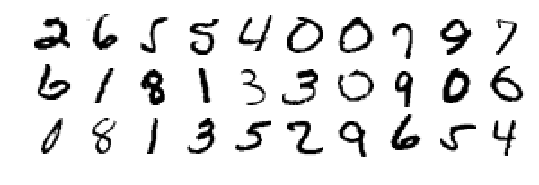

In [14]:
#Plot subset of train data to get a feel for how the fit performmed
plt.figure(figsize=(9,9))
example_test_images = np.r_[X_test[:3000:300], X_test[3000:6000:300], X_test[6000:9000:300]]
plot_digits(example_test_images, images_per_row=10)
plt.show()

In [15]:
# Predicted values for digits from First Model
print(y_test_pred_rfc[:3000:300])
print(y_test_pred_rfc[3000:6000:300])
print(y_test_pred_rfc[6000:9000:300])

[2 6 5 5 4 0 0 7 9 7]
[6 1 8 1 3 3 0 9 0 6]
[0 8 1 3 5 2 9 6 5 4]


## 4.2 Kaggle Submission #2

    Kaggle Accuracy Score: 0.87071

In [32]:
X_combined = X_test.append(X_train)
X_combined.shape

(70000, 784)

In [ ]:
trainimages=trainimages.astype(int)
testimages=testimages.astype(int)

In [47]:
#For the second experiment we first perfrom Dimensionality Reudction using Principal Component Analysis and time how long it takes
# We are asked to perform PCA on the combined Train and Test together.
# We then fit a random forest classifier to the dimensionality reduced  set and time how long it takes to fit the model

X_combined = np.concatenate((X_train,X_test), axis=0)
X_combined.shape

#PCA
#We seek to reduce the data by generating principal components 
#that represent 95 percent of the variability in the explanatory variable

pca = PCA(n_components=0.95, random_state=RANDOM_SEED)


##Intitialize beginning time for fit
start_time = time()

#Fit combined model
pca.fit(X_combined)

#Determine ending time for fit
elapsed_time = time() - start_time

#Display time elapsed
print("Experiment 2 PCA Time Elapsed : ", round(elapsed_time,6), "seconds")

#Check reduced dimensions and that criteria was met
X_combined = pca.transform(X_combined)
print("New number of dimensions post-PCA : ", pca.n_components_)
print("Explained variance percentage : ", round(100*np.sum(pca.explained_variance_ratio_),2), "%")


Experiment 2 PCA Time Elapsed :  15.484886 seconds
New number of dimensions post-PCA :  154
Explained variance percentage :  95.03 %


ValueError: operands could not be broadcast together with shapes (70000,154) (784,) 

In [48]:
#First we need to split out the train and test data again
X_train_reduced =  pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

print("X_train_reduced shape: ", X_train_reduced.shape)
print("X_test_reduced shape: ", X_test_reduced.shape)

X_train_reduced shape:  (42000, 154)
X_test_reduced shape:  (28000, 154)


In [63]:
X_train_reduced == X_combined[:42000]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [69]:
X_train_reduced = X_train_reduced.astype('int64')

In [70]:
X_train_reduced.dtype

dtype('int64')

In [71]:
X_train.dtype

dtype('int64')

In [74]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
X_train_reduced

array([[-675, -682,  186, ...,  -10,  -16,   63],
       [1690, -402, -488, ...,  -26,   -7,  -42],
       [-890, -275,   79, ...,    0,  -18,   -9],
       ...,
       [ 359,  942, -154, ...,  -19,    6,  -13],
       [ 334,   58,  692, ...,   30,  -24,   41],
       [-351,  427,   51, ...,  -11,  -42,   64]], dtype=int64)

In [72]:
# We now fit the demensionality reduced data using the same classifier as before
# We are given the parameters to use for the RFC fit:
#n_features=10 okay because of large number of observations
#max_features = 'sqrt' as reccommended by Müller and Guido (2017) 
#bootstrap = True
#n_jobs = -1 to use all available processers

#We set up the classifier 
rfc2 = RandomForestClassifier(n_estimators = 90, n_jobs=-1, random_state = 1234)

#Intitialize beginning time for fit
start_time = time()

#Fit model
rfc2.fit(X_train_reduced,y_train)

#Determine ending time for fit
elapsed_time = time() - start_time

#Display time elapsed
print("Experiment 2 Model Fit Time-Elaspsed : ", round(elapsed_time,6), "seconds")

Experiment 2 Model Fit Time-Elaspsed :  18.053033 seconds


In [20]:
#We first check the accuracy of the fit model on the training data:
y_train_pred_pca_rfc = rfc2.predict(X_train_reduced)
print("Training accuracy = ", round(100*accuracy_score(y_train, y_train_pred_pca_rfc),2), "%")

Training accuracy =  99.86 %


In [21]:
#We now use the fit model to predict the classification of the test data and create Kaggle submission # 2
y_test_pred_pca_rfc = rfc2.predict(X_test_reduced)

# output result
dataframe2 = pd.DataFrame({"ImageId": list(range(1,len(y_test_pred_pca_rfc)+1)), "Label": y_test_pred_pca_rfc})
dataframe2.to_csv('output_pca_rfc.csv', index=False, header=True)

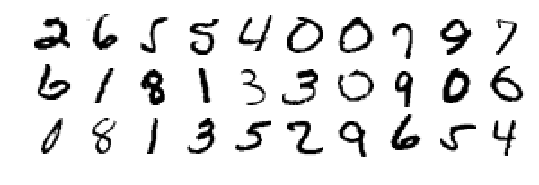

In [22]:
#Plot subset of train data to get a feel for how the fit performmed
plt.figure(figsize=(9,9))
example_test_images = np.r_[X_test[:3000:300], X_test[3000:6000:300], X_test[6000:9000:300]]
plot_digits(example_test_images, images_per_row=10)
plt.show()

In [23]:
# Predicted values for digits from Second Model
print(y_test_pred_pca_rfc[:3000:300])
print(y_test_pred_pca_rfc[3000:6000:300])
print(y_test_pred_pca_rfc[6000:9000:300])

[2 6 0 5 4 0 0 7 7 7]
[6 1 4 1 3 3 0 4 0 6]
[1 3 1 3 5 3 9 6 5 4]


## 4.2 Kaggle Submission #3

Revised full train-and-test regime
Random Forest Classifer with Principal Component Analysis
    
    PCA Time Elapsed :  10.781617 seconds
    Model Fit Time-Elaspsed :  3.525202 seconds 
    Kaggle Accuracy Score: 0.87885

I picked my brain and I could not determine what the "MAJOR" flaw is. I will need to reach out for direction as to why this is something that I am missing here. Below is the code I tried to find something that made a difference, but I was unsuccesful to determine something that funtionally changed...

Npw, we want to use a true train-and-test regime within a cross-validation design, evaluating different parameters and whether PCA is needed or not. We also wish to evaluate the models based on F1 score instead of pure accuracy to get a better understanding of what types of errors it is making. The predictions will also be cross validation predictions.

In [39]:
#Start with same data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [40]:
#Since we can't cross-validate on the test data-set, we will create a split of the test dataset that we can use as a holdout to test.
X_train_holdout = X_train.iloc[32000:,:]
X_train_train = X_train.iloc[:32000,:]

y_train_holdout = y_train[32000:]
y_train_train = y_train[:32000]

In [41]:
#Start with same data
print(X_train_train.shape)
print(X_train_holdout.shape)
print(y_train_train.shape)
print(y_train_holdout.shape)

(32000, 784)
(10000, 784)
(32000,)
(10000,)


In [42]:
print(y_train_train.value_counts())
print(y_train_holdout.value_counts())

1    3545
7    3343
3    3302
2    3214
9    3192
6    3146
4    3140
0    3121
8    3094
5    2903
Name: label, dtype: int64
1    1139
7    1058
3    1049
0    1011
9     996
6     991
8     969
2     963
4     932
5     892
Name: label, dtype: int64


Still representative so can use this split

In [43]:
# We will also create a reduced model using PCA that can be compared. This time we will fit the model on just the train data and
# then apply the same transform to the train and test data

#For the second experiment we first perfrom Dimensionality Reudction using Principal Component Analysis and time how long it takes
# We are asked to perform PCA on the combined Train and Test together.
# We then fit a random forest classifier to the dimensionality reduced  set and time how long it takes to fit the model


#PCA
#We seek to reduce the data by generating principal components 
#that represent 95 percent of the variability in the explanatory variable

pca2 = PCA(n_components=0.95, random_state=RANDOM_SEED)


##Intitialize beginning time for fit
start_time = time()

#Fit combined model
pca2.fit(X_train_train)

#Determine ending time for fit
elapsed_time = time() - start_time

#Display time elapsed
print("Experiment 3 PCA Time Elapsed : ", round(elapsed_time,6), "seconds")

#Check reduced dimensions and that criteria was met
X_train_train_reduced = pca2.transform(X_train_train)
X_test_reduced = pca2.transform(X_test)
X_train_holdout_reduced = pca2.transform(X_train_holdout)
print("New number of dimensions post-PCA : ", pca.n_components_)
print("Explained variance percentage : ", round(100*np.sum(pca.explained_variance_ratio_),2), "%")


Experiment 3 PCA Time Elapsed :  7.740443 seconds
New number of dimensions post-PCA :  154
Explained variance percentage :  95.03 %


In [29]:
print(X_train_train_reduced.shape)
print(X_test_reduced.shape)
print(X_train_holdout_reduced.shape)

(32000, 153)
(28000, 153)
(10000, 153)


In [30]:
#Finally we also want to test scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_train)
X_train_train_scaled = scaler.transform(X_train_train)
X_train_holdout_scaled = scaler.transform(X_train_holdout)
X_test_scaled = scaler.transform(X_test)

scaler.fit(X_train_train_reduced)
X_train_train_reduced_scaled = scaler.transform(X_train_train_reduced)
X_train_holdout_reduced_scaled = scaler.transform(X_train_holdout_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

In [31]:
# We set-up our Random Forest Classifier again
rfc3 = RandomForestClassifier(n_estimators = 10, max_features = 'sqrt', bootstrap = True, n_jobs=-1, random_state = RANDOM_SEED)

In [32]:
#We now use cross validation score for each possible cobination of features
print(cross_val_score(rfc3, X_train_train, y_train_train, cv=3, scoring="accuracy"))
print(cross_val_score(rfc3, X_train_train_reduced, y_train_train, cv=3, scoring="accuracy"))
print(cross_val_score(rfc3, X_train_train_scaled, y_train_train, cv=3, scoring="accuracy"))
print(cross_val_score(rfc3, X_train_train_reduced_scaled, y_train_train, cv=3, scoring="accuracy"))

[0.9308406  0.92828349 0.92796849]
[0.85971324 0.85591075 0.85678109]
[0.9308406  0.92828349 0.92796849]
[0.8601818  0.85544202 0.85678109]


Scaling and reducing appear to make the model perform worse or no better?

In [33]:
rfc3.fit(X_train_train, y_train_train)
y_predict_train_train = rfc3.predict(X_train_train)
y_predict_train_holdout = rfc3.predict(X_train_holdout)
print(accuracy_score(y_train_holdout,y_predict_train_holdout))

0.9372


In [34]:
rfc3.fit(X_train_train_reduced, y_train_train)
y_predict_train_train_reduced = rfc3.predict(X_train_train_reduced)
y_predict_train_holdout_reduced = rfc3.predict(X_train_holdout_reduced)
print(accuracy_score(y_train_holdout,y_predict_train_holdout))

0.9372


In [35]:
print(precision_score(y_train_train, y_predict_train_train, average='macro'))
print(recall_score(y_train_train, y_predict_train_train, average='macro'))
print(f1_score(y_train_train, y_predict_train_train, average='macro'))

0.999124860253897
0.9991296533744126
0.9991270696461729


In [50]:
#I want to see if the reduced model on just the train data and then standarized actually does better in Kaggle?
rfc3.fit(X_train_train_reduced_scaled, y_train_train)
y_predict_train_holdout_reduced = rfc3.predict(X_train_holdout_reduced_scaled)
y_pca_rfc_std = rfc3.predict(X_test_reduced_scaled)
print(accuracy_score(y_train_holdout,y_predict_train_holdout_reduced))

# output result
dataframe3 = pd.DataFrame({"ImageId": list(range(1,len(y_pca_rfc_std)+1)), "Label": y_pca_rfc_std})
dataframe3.to_csv('output_pca_rfc_std.csv', index=False, header=True)


0.8746


In [ ]:
I want to see if the reduced model on just the train data and then standarized actually does better in Kaggle

In [36]:
conf_mx = confusion_matrix(y_train_train, y_predict_train_train)
conf_mx

array([[3121,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 3543,    2,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 3212,    0,    0,    0,    0,    1,    1,    0],
       [   1,    0,    2, 3297,    0,    0,    0,    0,    1,    1],
       [   0,    0,    0,    0, 3140,    0,    0,    0,    0,    0],
       [   0,    0,    0,    2,    0, 2901,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0, 3144,    0,    0,    0],
       [   0,    0,    2,    1,    1,    0,    0, 3338,    0,    1],
       [   0,    0,    1,    1,    2,    0,    0,    0, 3089,    1],
       [   0,    0,    0,    1,    1,    1,    0,    2,    0, 3187]],
      dtype=int64)

In [37]:
# from sklearn.linear_model import SGDClassifier
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.neighbors import KNeighborsClassifier

# rfc3 = RandomForestClassifier(n_estimators = 10, max_features = 'sqrt', bootstrap = True, n_jobs=-1, random_state = RANDOM_SEED)
# ovo_clf = OneVsOneClassifier(SGDClassifier(fit_intercept=True, max_iter=1000, tol=1e-3, n_jobs=-1 random_state=RANDOM_SEED))
# knn_clf = KNeighborsClassifier(n_jobs=-1)

# names = ("Random Forest Classifier", "OneVsOne SGD Classifier", "KNeighborsClassifier")
# classifiers = (rfc3, ovo_clf, knn_clf)

In [38]:
# # specify the k-fold cross-validation design
# from sklearn.model_selection import KFold

# # ten-fold cross-validation employed here

# N_FOLDS = 10
# print('\nProgress with' + str(N_FOLDS) + '-fold cross-validation')

# # set up numpy array for storing results
# cv_results_roc = np.zeros((N_FOLDS, len(names)))
# cv_results_accuracy = np.zeros((N_FOLDS, len(names)))

# kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# # check the splitting process by looking at fold observation counts
# index_for_fold = 0  # fold count initialized 
# for train_index, test_index in kf.split(model_data):
#     print('\nFold index:', index_for_fold,
#           '------------------------------------------')
# #   the structure of modeling data for this study has the
# #   response variable coming first and explanatory variables later          
# #   so 1:model_data.shape[1] slices for explanatory variables
# #   and 0 is the index for the response variable    
#     X_train_kfold = model_data[train_index, 1:model_data.shape[1]]
#     X_test_kfold = holdout_data[test_index, 1:model_data.shape[1]]
#     y_train_kfold = model_data[train_index, 0]
#     y_test_kfold = holdout_data[test_index, 0]   
#     print('\nShape of input data for this fold:',
#           '\nData Set: (Observations, Variables)')
#     print('X_train:', X_train_kfold.shape)
#     print('X_test:',X_test_kfold.shape)
#     print('y_train:', y_train_kfold.shape)
#     print('y_test:',y_test_kfold.shape)

#     index_for_method = 0  # initialize
#     for name, clf in zip(names, classifiers):
#         print('\nClassifier evaluation for:', name)
#         print('  Scikit Learn method:', clf)
#         clf.fit(X_train_kfold, y_train_kfold)  # fit on the train set for this fold
#         # evaluate on the test set for this fold
#         y_test_predict_kfold = clf.predict(X_test_kfold)
#      #   fold_method_result_roc = roc_auc_score(y_test_kfold, y_test_predict_kfold[:,1]) 
#         fold_method_result_accuracy = accuracy_score(y_test_kfold, y_test_predict_kfold)
#      #   print('Area under ROC curve:', fold_method_result_roc)
#         print('Accuracy:', fold_method_result_accuracy)
#     #    cv_results_roc[index_for_fold, index_for_method] = fold_method_result_roc
#         cv_results_accuracy[index_for_fold, index_for_method] = fold_method_result_accuracy
#         index_for_method += 1
  
#     index_for_fold += 1

# cv_results_roc_df = pd.DataFrame(cv_results_roc)
# cv_results_roc_df.columns = names

# cv_results_accuracy_df = pd.DataFrame(cv_results_accuracy)
# cv_results_accuracy_df.columns = names

# print('\n----------------------------------------------')
# print('Average results from ', N_FOLDS, '-fold cross-validation\n',
#       '\nMethod                 Area under ROC Curve                Accuracy', sep = '')     
# print(cv_results_roc_df.mean(), '     ', cv_results_accuracy_df.mean())   
